# Setup

In [2]:
import matplotlib.pyplot as plt
from stock_analysis.utils import group_stocks, make_portfolio

In [3]:
import stock_analysis

reader = stock_analysis.StockReader('2019-01-01', '2020-12-31')

# Get faang data
tickers = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in tickers
)

# Get S&P 500 data
sp500 = reader.get_index_data('S&P 500')

# Get Bitcoin data
bitcoin = reader.get_bitcoin_data('USD')


# Exercise 1

Using the StockAnalyzer and StockVisualizer classes, calculate and plot
three levels of support and resistance for Netflix's closing price.

In [4]:
nflxAnalysis = stock_analysis.StockAnalyzer(nflx)

# Calculate support and resistance levels

supportLevels = list(
    nflxAnalysis.support(level=level+1)
    for level in range(3)
)

resistanceLevels = list(
    nflxAnalysis.resistance(level=level+1)
    for level in range(3)
)

linestyles = [':', '--', '-.']


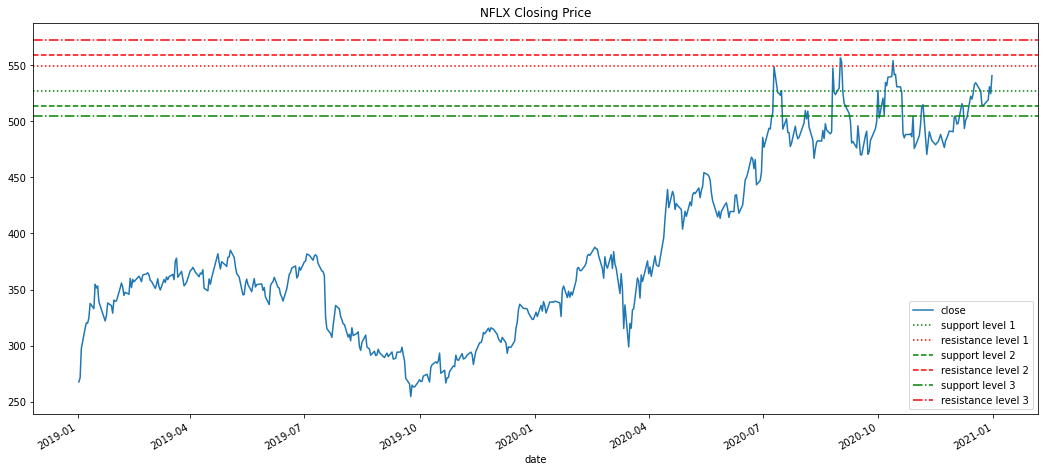

In [5]:
nflxViz = stock_analysis.StockVisualizer(nflx)

# Plot Netflix stock and its support and resistance levels

ax = nflxViz.evolution_over_time(
    column='close', 
    figsize=(18, 8), 
    title='NFLX Closing Price'
)

zipped = zip(
    supportLevels, 
    resistanceLevels, 
    linestyles, 
    range(1, 4)
)
for support, resistance, linestyle, level in zipped:
    nflxViz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflxViz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )



# Exercise 2

With the StockVisualizer class, look at the effect of after-hours trading on the
FAANG stocks:

- As individual stocks
- As a portfolio using the make_portfolio() function from the stock_analysis.utils module

In [6]:
faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

array([[<AxesSubplot:title={'center':"Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Netflix Open Price - Prior Day's Close"}, xlabel='da

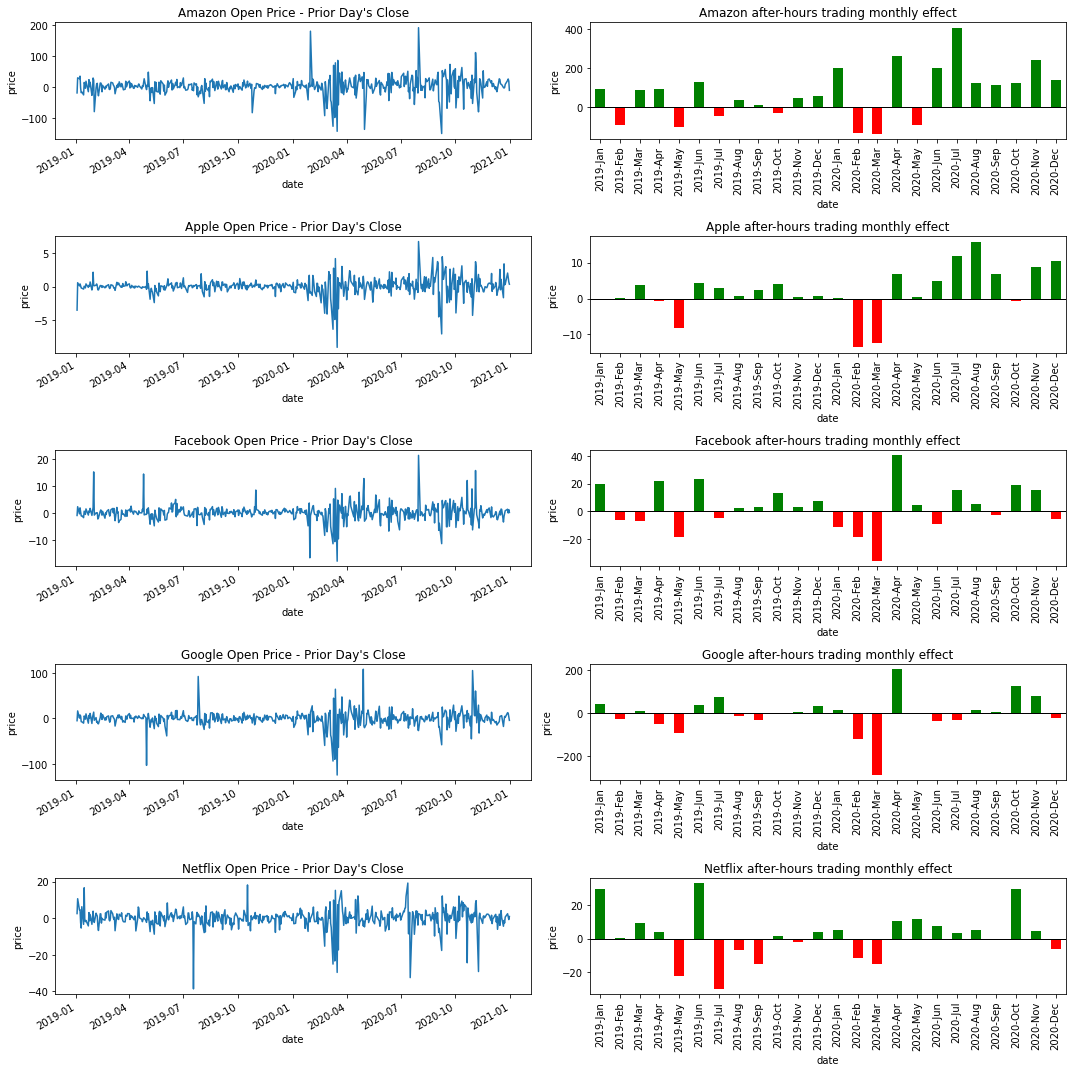

In [7]:
faangViz = stock_analysis.AssetGroupVisualizer(faang)
faangViz.after_hours_trades()

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

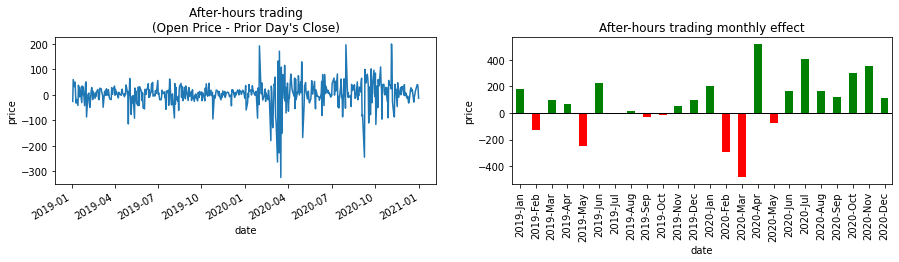

In [8]:
portfolio = make_portfolio(faang)

portfolioViz = stock_analysis.StockVisualizer(portfolio)
portfolioViz.after_hours_trades()

# Exercise 3

Using the StockVisualizer.open_to_close() method, create a plot that
fills the area between the FAANG stocks' opening price (as a portfolio) and its
closing price each day in red if the price declined and in green if the price increased.
As a bonus, do the same for a portfolio of bitcoin and the S&P 500.

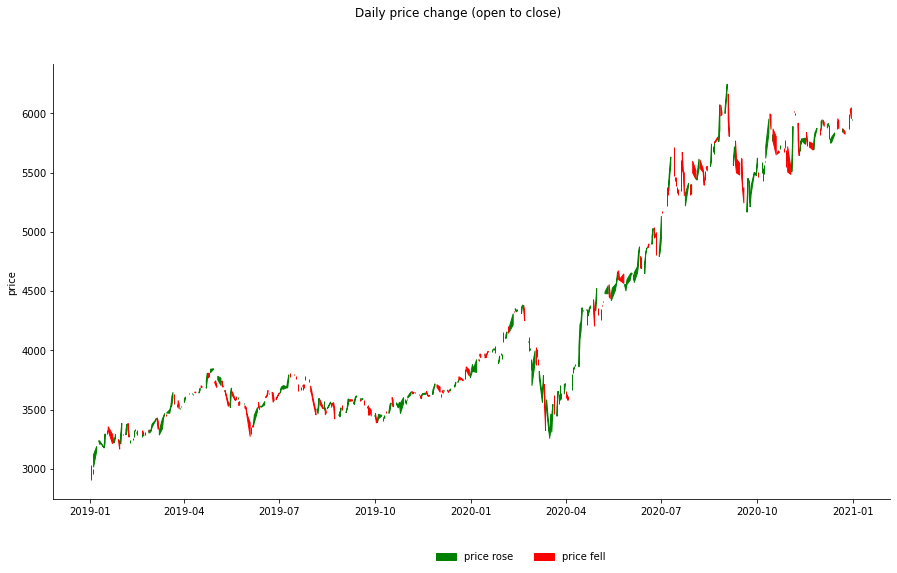

In [9]:
# Filling the area between open and close prices of FAANG stocks

ax = portfolioViz.open_to_close(figsize=(15, 8))

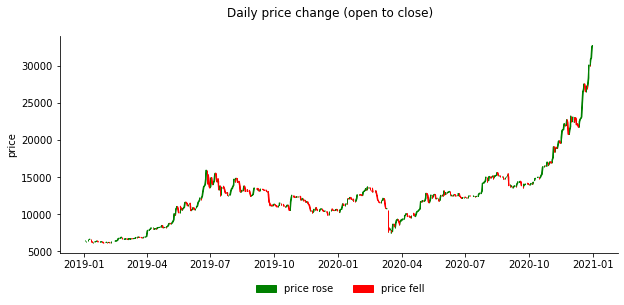

In [10]:
# Filling the area between open and close prices of BTC + SP500
import pandas as pd


def reindex_stock_data(df, start, end):
    """Handles reindexing of stock data"""
    result = df\
        .copy()\
        .reindex(
            pd.date_range(start=start, end=end, freq='D')
        )\
        .assign(
            volume=lambda x: x.fillna(0),
            close=lambda x: x.fillna(method='ffill'),
            open=lambda x: x.open.combine_first(x.close),
            high=lambda x: x.high.combine_first(x.close),
            low=lambda x: x.low.combine_first(x.close)
        )
    result.index.rename('date', inplace=True)
    return result


sp500Reindexed = reindex_stock_data(
    sp500, 
    start='2019-01-01', 
    end='2020-12-31'
)
ax = stock_analysis\
    .StockVisualizer(bitcoin + sp500Reindexed)\
    .open_to_close()


# Exercise 4

Mutual funds and exchange-traded funds (ETFs) are funds that are composed
of many assets. They are built to mitigate risk, so volatility for the fund will
be lower than that of the assets that compose it. (Information on how they
differ can be found at https://www.investopedia.com/articles/
exchangetradedfunds/08/etf-mutual-fund-difference.asp .)
Compare a mutual fund or ETF of your choice to three of its largest stocks (by
composition) using annualized volatility and the AssetGroupAnalyzer class.

In [11]:
'''
* The Fidelity Blue Chip Growth Fund (FBGRX) was selected
* The fund composition is described at
https://fundresearch.fidelity.com/mutual-funds/summary/316389303
'''
fbgrx = reader.get_ticker_data('FBGRX')
msft = reader.get_ticker_data('MSFT')

mutualFund = group_stocks(
    {
        '0 - FBGRX': fbgrx,
        '1 - Apple': aapl,
        '2 - Amazon': amzn,
        '3 - Microsoft': msft,
    }
)
stock_analysis\
    .AssetGroupAnalyzer(mutualFund)\
    .analyze('annualized_volatility')


{'0 - FBGRX': 0.368586600788326,
 '1 - Apple': 0.4670809643500882,
 '2 - Amazon': 0.3851099077041784,
 '3 - Microsoft': 0.4394683613426673}

# Exercise 5



Write a function that returns a dataframe of one row with columns for
alpha , beta , sharpe_ratio , annualized_volatility , is_bear_
market , and is_bull_market , which each contain the results of running
the respective methods on a given stock using the StockAnalyzer class.
Dictionary comprehensions and the getattr() function, as used in the
AssetGroupAnalyzer.analyze() method, will be useful.

In [12]:
import pandas as pd
from stock_analysis.stock_analyzer import StockAnalyzer


def calc_financial_metrics(stock, index, r_f):
    functionsAndKwargs = {
        'alpha': {
            'index': index, 
            'r_f': r_f
        }, 
        'beta': {
            'index': index
        }, 
        'sharpe_ratio': {
            'r_f': r_f
        },
        'annualized_volatility': {},
        'is_bear_market': {},
        'is_bull_market': {},
    }

    metrics = dict(
        (
            metric, # Keys
            getattr(StockAnalyzer(stock), metric)(**kwargs) # Values
        )
        for metric, kwargs in functionsAndKwargs.items()
    )
    return pd.DataFrame(metrics, index=range(1))


# Test the function

r_f = reader.get_risk_free_rate_of_return()
fbMetrics = calc_financial_metrics(
    stock=fb, 
    index=sp500, 
    r_f=r_f
)
fbMetrics


,alpha,beta,sharpe_ratio,annualized_volatility,is_bear_market,is_bull_market
0,0.504863,1.024593,3.714129,0.459431,False,False


# Exercise 6

With the StockModeler class, build an ARIMA model fit on the S&P 500
data from January 1, 2019 through November 30, 2020 and use it to predict the
performance in December 2020. Be sure to examine the residuals and compare the
predicted performance to the actual performance.

In [13]:
import datetime as dt
from pandas.plotting import autocorrelation_plot
from stock_analysis import StockModeler

sp500Training = sp500.loc['2019':'2020-11',:]
sp500Testing = sp500.loc['2020-12',:]

### Plotting the autocorrelation of the closing price

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

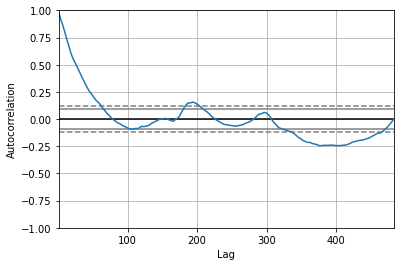

In [14]:
# From the autocorrelation plot, a good starting point is AR=15

autocorrelation_plot(sp500Training.close) 

### Building the  ARIMA model that fits in a reasonable amount of time and plotting the residuals

/home/user/github/will-i-amv-books/Hands-On-Data-Analysis-with-Pandas-2nd-edition/env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

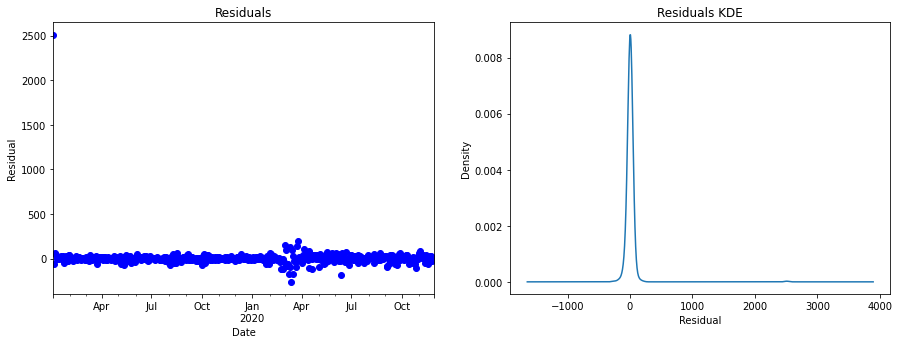

In [15]:
# %%capture is a magic method that avoids printing any warnings 
# triggered by the ARIMA model fitting

#%%capture 
arima_model = StockModeler.arima(sp500Training, ar=15, i=1, ma=5)

StockModeler.plot_residuals(arima_model)


### Comparing the ARIMA model's prediction to what actually happened

Text(0, 0.5, 'price ($)')

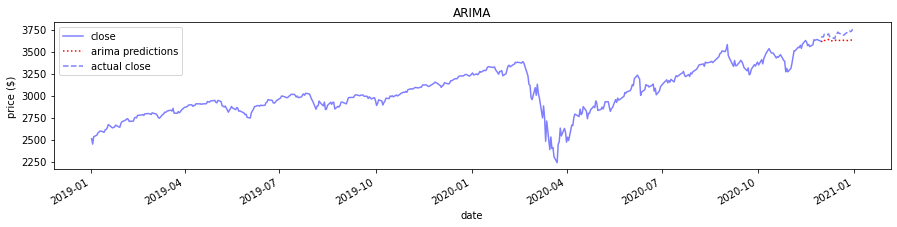

In [16]:
dates = sp500Testing.index

arima_ax = StockModeler.arima_predictions(
    sp500Training, 
    arima_model, 
    start=dates[0], 
    end=dates[-1],
    title='ARIMA', 
    color='b', 
    figsize=(15, 3), 
    alpha=0.5
)

sp500Testing.close.plot(
    ax=arima_ax, 
    style='b--', 
    label='actual close', 
    alpha=0.5
)

arima_ax.legend()
arima_ax.set_ylabel('price ($)')



# Exercise 7

Request an API key for AlphaVantage (https://www.alphavantage.co/
support/#api-key) and collect the daily foreign exchange rate from USD to
JPY using the get_forex_rates() method on the same StockReader object
you created to collect the data for the previous exercises. Build a candlestick plot
with the data from February 2019 through January 2020, resampled to 1-week
intervals. Hint: take a look at the slice() function from the standard library
( https://docs.python.org/3/library/functions.html#slice )
in order to provide the date range.

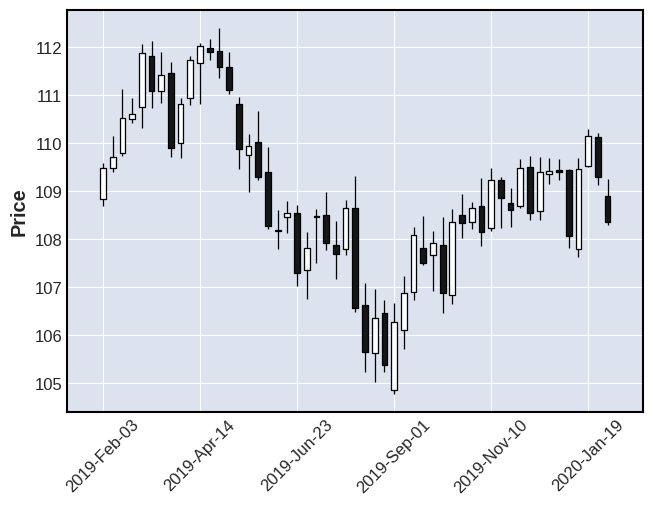

In [17]:
usdJpyRate = reader.get_forex_rates(
    'USD', 
    'JPY', 
    api_key='ALPHA_VANTAGE_API_KEY'
)

UsdJpyViz = stock_analysis.StockVisualizer(usdJpyRate)

UsdJpyViz.candlestick(
    date_range=slice('2019-02-01', '2020-01-31'), 
    resample='1W'
)

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_01/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Chapter 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>